In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

Epoch: 3 | Inputs: 189 | Kernel: 3 | Dropout: 0.2 | Loss: mae

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [40]:
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]

In [41]:
train.shape

(2046, 2)

In [44]:
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  test.shape

(1755,)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
59/59 [==============================] - 17s 16ms/step - loss: 0.3015 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3015
Epoch 2/3
59/59 [==============================] - 1s 12ms/step - loss: 0.0843 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0843
Epoch 3/3
55/55 [==============================] - 1s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3069 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3069
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0842 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0842
Epoch 3/3
55/55 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3599 - accuracy: 0.0011 - mean_absolute_error: 0.3599
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0815 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0815
Epoch 3/3
55/55 [==============================] - 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 11ms/step - loss: 0.4290 - accuracy: 5.3850e-04 - mean_absolute_error: 0.4290
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0858 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0858
Epoch 3/3
55/55 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 13ms/step - loss: 0.3807 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3807
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0978 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0978
Epoch 3/3
55/55 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2849 - accuracy: 5.3850e-04 - mean_absolute_error: 0.2849
Epoch 2/3
59/59 [==============================] - 1s 11ms/step - loss: 0.0887 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0887
Epoch 3/3
55/55 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3534 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3534
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0940 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0940
Epoch 3/3
55/55 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2720 - accuracy: 5.3850e-04 - mean_absolute_error: 0.2720
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0739 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0739
Epoch 3/3
55/55 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1990 - accuracy: 5.3850e-04 - mean_absolute_error: 0.1990
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0713 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0713
Epoch 3/3
55/55 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [===

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 7s 13ms/step - loss: 0.3910 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3910
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0967 - accuracy: 5.3850e-04 - mean_absolute_error: 0.0967
Epoch 3/3
55/55 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3712 - accuracy: 5.3850e-04 - mean_absolute_error: 0.3712
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.1075 - accuracy: 5.3850e-04 - mean_absolute_error: 0.1075
Epoch 3/3
55/55 [==============================] - 1s 4ms/step


In [ ]:
Accuracy

[64.37627896759409,
 62.62506905916085,
 60.11212044649482,
 63.373055687535015,
 60.08769754297241,
 58.90878405617388,
 63.23644539584606,
 54.18947311783828,
 63.66600753940701,
 63.70815109105781,
 57.1546578548394,
 60.9239821738665,
 61.586372380559816,
 53.128787887560634,
 57.866784107703765]

In [ ]:
RMSE

[0.0038157988189983327,
 0.004033439847569831,
 0.0048190842027733705,
 0.004094865131421784,
 0.004048623189293897,
 0.0044318723159794075,
 0.003788478378819932,
 0.0038237372382925994,
 0.0043730404484074795,
 0.004089034577973615,
 0.0038578313495612293,
 0.004820801347496974,
 0.004418021761473569,
 0.004280264311024269,
 0.003929245398792267]

In [ ]:
Quasilikelihood

[0.10432513035240779,
 0.12035355452257819,
 0.17311040033087086,
 0.12283464398501331,
 0.12059483755806524,
 0.14569916730277013,
 0.10679027247655946,
 0.13410121798619024,
 0.12841228709050545,
 0.11498621356903332,
 0.12225612776623294,
 0.15955659823009508,
 0.13413398581945457,
 0.14003333933243467,
 0.12185975585355469]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

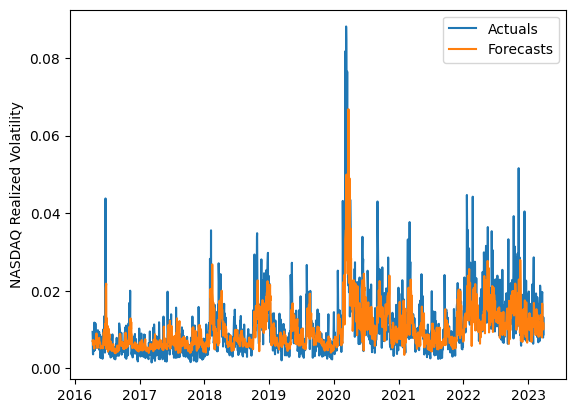

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2811 - accuracy: 0.3376 - mean_absolute_error: 0.2811
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0772 - accuracy: 0.3613 - mean_absolute_error: 0.0772
Epoch 3/3
19/19 [==============================] - 0s 6ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.2651 - accuracy: 0.3220 - mean_absolute_error: 0.2651
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0642 - accuracy: 0.3371 - mean_absolute_error: 0.0642
Epoch 3/3
19/19 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 12ms/step - loss: 0.3197 - accuracy: 0.3845 - mean_absolute_error: 0.3197
Epoch 2/3
59/59 [==============================] - 1s 13ms/step - loss: 0.0774 - accuracy: 0.3651 - mean_absolute_error: 0.0774
Epoch 3/3
19/19 [==============================] - 0s 4ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2852 - accuracy: 0.3231 - mean_absolute_error: 0.2852
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0673 - accuracy: 0.2978 - mean_absolute_error: 0.0673
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.1967 - accuracy: 0.2999 - mean_absolute_error: 0.1967
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0575 - accuracy: 0.2978 - mean_absolute_error: 0.0575
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [============================

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2378 - accuracy: 0.3301 - mean_absolute_error: 0.2378
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0635 - accuracy: 0.3409 - mean_absolute_error: 0.0635
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2189 - accuracy: 0.3446 - mean_absolute_error: 0.2189
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0596 - accuracy: 0.3156 - mean_absolute_error: 0.0596
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 13ms/step - loss: 0.3604 - accuracy: 0.3619 - mean_absolute_error: 0.3604
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0792 - accuracy: 0.3705 - mean_absolute_error: 0.0792
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [============================

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.2536 - accuracy: 0.3204 - mean_absolute_error: 0.2536
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0680 - accuracy: 0.3387 - mean_absolute_error: 0.0680
Epoch 3/3
19/19 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3417 - accuracy: 0.3258 - mean_absolute_error: 0.3417
Epoch 2/3
59/59 [==============================] - 1s 12ms/step - loss: 0.0743 - accuracy: 0.3139 - mean_absolute_error: 0.0743
Epoch 3/3
19/19 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2543 - accuracy: 0.3113 - mean_absolute_error: 0.2543
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0693 - accuracy: 0.3689 - mean_absolute_error: 0.0693
Epoch 3/3
19/19 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.004183605500255648,
 0.004148764968165366,
 0.003898136870811219,
 0.004203083689980581,
 0.004594793688468216,
 0.004001573593521707,
 0.004703207119344072,
 0.003907491951724233,
 0.004329316282950951,
 0.0039610715454377445,
 0.004349410595128091,
 0.0045664539947154305,
 0.004764448737840343,
 0.004278346663304974,
 0.004047118893489566]

In [ ]:
Accuracy

[60.60225106658115,
 60.5153861960273,
 62.22602067271381,
 60.40220868838172,
 61.131389467613914,
 62.79811214549829,
 57.816189424155894,
 58.59257706414957,
 60.5145561372072,
 61.34344397729834,
 63.36216764136387,
 60.16457614235541,
 59.057701641190505,
 62.87099694288396,
 58.02793317281767]

In [ ]:
Quasilikelihood

[0.13157258663572424,
 0.1209129526574353,
 0.11069844916052694,
 0.12764683631995294,
 0.13543020938430045,
 0.11584217802459598,
 0.15547354381211248,
 0.12299351223967722,
 0.12794564701619235,
 0.11408958920562837,
 0.12227249966118665,
 0.14269388728321492,
 0.1600804964114231,
 0.12164443300682955,
 0.12698315860992007]

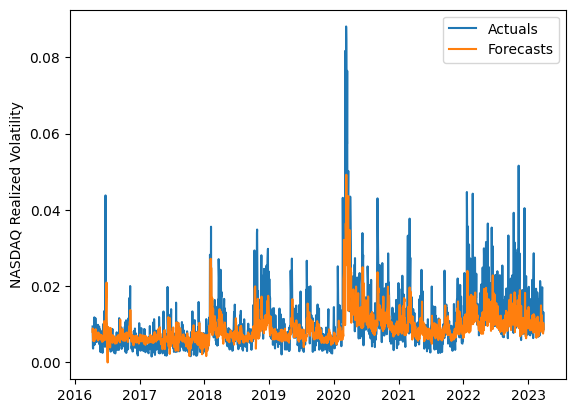

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.2390 - accuracy: 0.2176 - mean_absolute_error: 0.2390
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0564 - accuracy: 0.1788 - mean_absolute_error: 0.0564
Epoch 3/3
11/11 [==============================] - 0s 10ms/step
Epoch 1/3
59/59 [==============================] - 6s 13ms/step - loss: 0.4573 - accuracy: 0.2289 - mean_absolute_error: 0.4573
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0845 - accuracy: 0.2159 - mean_absolute_error: 0.0845
Epoch 3/3
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2913 - accuracy: 0.1750 - mean_absolute_error: 0.2913
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0676 - accuracy: 0.1858 - mean_absolute_error: 0.0676
Epoch 3/3
11/11 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2162 - accuracy: 0.1729 - mean_absolute_error: 0.2162
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0562 - accuracy: 0.1621 - mean_absolute_error: 0.0562
Epoch 3/3
11/11 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3166 - accuracy: 0.1772 - mean_absolute_error: 0.3166
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0711 - accuracy: 0.1551 - mean_absolute_error: 0.0711
Epoch 3/3
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 7s 11ms/step - loss: 0.2650 - accuracy: 0.1933 - mean_absolute_error: 0.2650
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0611 - accuracy: 0.1788 - mean_absolute_error: 0.0611
Epoch 3/3
11/11 [==============================] - 1s 6ms/step
Epoch 1/3
59/59 [==============================] - 11s 10ms/step - loss: 0.4227 - accuracy: 0.1788 - mean_absolute_error: 0.4227
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0796 - accuracy: 0.2025 - mean_absolute_error: 0.0796
Epoch 3/3
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3168 - accuracy: 0.2095 - mean_absolute_error: 0.3168
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0781 - accuracy: 0.2057 - mean_absolute_error: 0.0781
Epoch 3/3
11/11 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2741 - accuracy: 0.2246 - mean_absolute_error: 0.2741
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0615 - accuracy: 0.2229 - mean_absolute_error: 0.0615
Epoch 3/3
11/11 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3800 - accuracy: 0.2229 - mean_absolute_error: 0.3800
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0802 - accuracy: 0.2084 - mean_absolute_error: 0.0802
Epoch 3/3
11/11 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [============================

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.004267087166172685,
 0.004486549643725058,
 0.004252429292771816,
 0.004146655032069622,
 0.0042315058632594,
 0.004023475106884676,
 0.005032385154272524,
 0.004833117583170915,
 0.004193616965048202,
 0.004215065411032019,
 0.004315179659580753,
 0.004521619373824614,
 0.003958880486263213,
 0.0040210375531385565,
 0.00412194563141669]

In [ ]:
Accuracy

[60.70205977182043,
 58.416773626396555,
 60.80757714534095,
 59.725957532669824,
 60.32530116094892,
 61.51993472606571,
 58.13665228552441,
 58.242001055519644,
 55.63923868134264,
 60.20605151159035,
 57.97391586240095,
 59.986000301658194,
 63.08253443888188,
 60.6436004162734,
 61.12924352982554]

In [ ]:
Quasilikelihood

[0.12449066018587969,
 0.13748539505506457,
 0.1257237147137491,
 0.12378844624257039,
 0.1259213622778285,
 0.11735352397348674,
 0.17859369389901858,
 0.15782386545046495,
 0.13688055416416767,
 0.12834038182607255,
 0.1344624406336397,
 0.14302812831661868,
 0.1094009641422239,
 0.12122302325015509,
 0.12309378788904228]

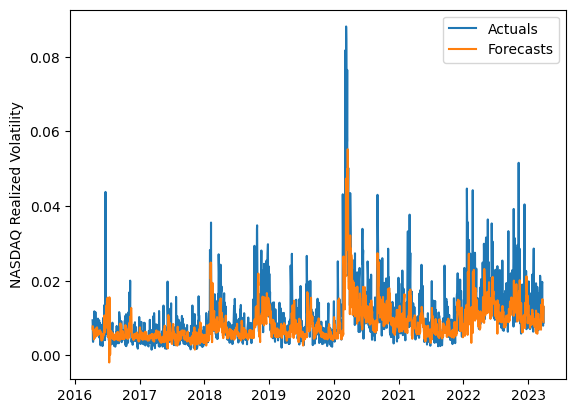

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2149 - accuracy: 0.0862 - mean_absolute_error: 0.2149
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0558 - accuracy: 0.1265 - mean_absolute_error: 0.0558
Epoch 3/3
6/6 [==============================] - 0s 17ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.2109 - accuracy: 0.0808 - mean_absolute_error: 0.2109
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0505 - accuracy: 0.0765 - mean_absolute_error: 0.0505
Epoch 3/3
6/6 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 7s 13ms/step - loss: 0.2395 - accuracy: 0.0937 - mean_absolute_error: 0.2395
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0549 - accuracy: 0.0937 - mean_absolute_error: 0.0549
Epoch 3/3
6/6 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.2295 - accuracy: 0.0802 - mean_absolute_error: 0.2295
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0564 - accuracy: 0.1082 - mean_absolute_error: 0.0564
Epoch 3/3
6/6 [==============================] - 0s 3ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1873 - accuracy: 0.0915 - mean_absolute_error: 0.1873
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0513 - accuracy: 0.0749 - mean_absolute_error: 0.0513
Epoch 3/3
6/6 [==============================] - 0s 4ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2604 - accuracy: 0.1529 - mean_absolute_error: 0.2604
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0535 - accuracy: 0.1287 - mean_absolute_error: 0.0535
Epoch 3/3
6/6 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6

In [ ]:
RMSE

[0.004375947468792599,
 0.004163927046964921,
 0.004231043882520016,
 0.004673827783017263,
 0.004504221913114375,
 0.004334307842273183,
 0.00440313067738318,
 0.00460927821877177,
 0.004380032221184645,
 0.004454659834299073,
 0.0044193867932983905,
 0.004364219436424419,
 0.004355210979718578,
 0.004758295412604457,
 0.004558386100796773]

In [ ]:
Accuracy

[55.9560397592528,
 57.532414596680766,
 56.642761915418745,
 58.11680884679337,
 58.05751536916646,
 53.44760569251373,
 57.02373646815593,
 57.30297322399167,
 52.725230536517806,
 56.241791311831236,
 55.57767429557159,
 54.250354055449826,
 55.830135346896235,
 58.80545242294246,
 58.96315133765212]

In [ ]:
Quasilikelihood

[0.14220596504362631,
 0.1322619494279788,
 0.13649779716019558,
 0.1458617553245964,
 0.14107022343067777,
 0.15009230906702914,
 0.14124382041856068,
 0.14543606483076607,
 0.1531743131496705,
 0.14555371049883953,
 0.1473183100050843,
 0.14849495658635664,
 0.14275477963312402,
 0.15134775609594586,
 0.13883935565451094]

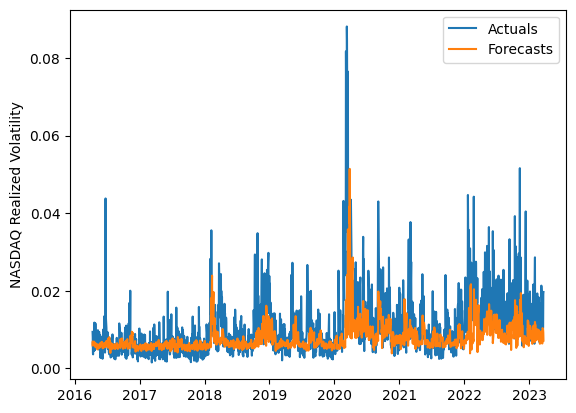

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-17]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1469 - accuracy: 0.0442 - mean_absolute_error: 0.1469
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0476 - accuracy: 0.0253 - mean_absolute_error: 0.0476
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.1883 - accuracy: 0.0409 - mean_absolute_error: 0.1883
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0497 - accuracy: 0.0269 - mean_absolute_error: 0.0497
Epoch 3/3
3/3 [==============================] - 0s 4ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2629 - accuracy: 0.0684 - mean_absolute_error: 0.2629
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0549 - accuracy: 0.0280 - mean_absolute_error: 0.0549
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 

3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 12ms/step - loss: 0.1687 - accuracy: 0.0420 - mean_absolute_error: 0.1687
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0514 - accuracy: 0.0307 - mean_absolute_error: 0.0514
Epoch 3/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0421 - accuracy: 0.0361 - mean_absolute_error: 0.0421


3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.2287 - accuracy: 0.0679 - mean_absolute_error: 0.2287
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0532 - accuracy: 0.0221 - mean_absolute_error: 0.0532
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1366 - accuracy: 0.0377 - mean_absolute_error: 0.1366
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0469 - accuracy: 0.0388 - mean_absolute_error: 0.0469
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 7s 14ms/step - loss: 0.1838 - accuracy: 0.0749 - mean_absolute_error: 0.1838
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0503 - accuracy: 0.0458 - mean_absolute_error: 0.0503
Epoch 3/3
3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.1818 - accuracy: 0.0512 - mean_absolute_error: 0.1818
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0524 - accuracy: 0.0495 - mean_absolute_error: 0.0524
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1808 - accuracy: 0.0285 - mean_absolute_error: 0.1808
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0494 - accuracy: 0.0118 - mean_absolute_error: 0.0494
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 6s 13ms/step - loss: 0.2169 - accuracy: 0.0258 - mean_absolute_error: 0.2169
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 0.0482 - accuracy: 0.0398 - mean_absolute_error: 0.0482
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3126 - accuracy: 0.0506 - mean_absolute_error: 0.3126
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0616 - accuracy: 0.0425 - mean_absolute_error: 0.0616
Epoch 3/3
3/3 [==============================] - 0s 5ms/step
Epoch 1/3
59/59 [==============================] - 7s 10ms/step - loss: 0.1819 - accuracy: 0.0781 - mean_absolute_error: 0.1819
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.0339 - mean_absolute_error: 0.0499
Epoch 3/3
3/3 [==============================] - 0s 6ms/step
Epoch 1/3
59/59 [==============================] - 6s 10ms/step - loss: 0.3249 - accuracy: 0.0296 - mean_absolute_error: 0.3249
Epoch 2/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0592 - accuracy: 0.0598 - mean_absolute_error: 0.0592
Epoch 3/3
3/3 [==============================] - 0s 7ms/step


In [ ]:
RMSE

[0.004593677269552806,
 0.004646595714234162,
 0.004923923171728646,
 0.004726615734303666,
 0.004651088767467432,
 0.004739689481685646,
 0.004601075661851177,
 0.004933611136151839,
 0.00469663661974852,
 0.004838735385218775,
 0.004866655105621243,
 0.004775977047258462,
 0.004845295358458819,
 0.004549985571688194,
 0.004769141970872474]

In [ ]:
Accuracy

[55.930749524817735,
 54.58341814248489,
 53.108898535238836,
 53.302493494160515,
 55.37890786324129,
 54.94613056111748,
 57.027410887345845,
 54.24059040323406,
 55.32465343540029,
 53.568367948124475,
 55.766203178539755,
 50.40115906018594,
 54.184792557338255,
 55.543155802984224,
 52.93276975785866]

In [ ]:
Quasilikelihood

[0.149716931014712,
 0.15817285593809516,
 0.1720771270573547,
 0.16540749846083064,
 0.15369616274648285,
 0.15931369726075575,
 0.14941184309469394,
 0.16830649883392335,
 0.15680787725476572,
 0.1676538399861924,
 0.16275442153945285,
 0.1752328041170703,
 0.1661756269054822,
 0.15068170607753945,
 0.16814003272954756]

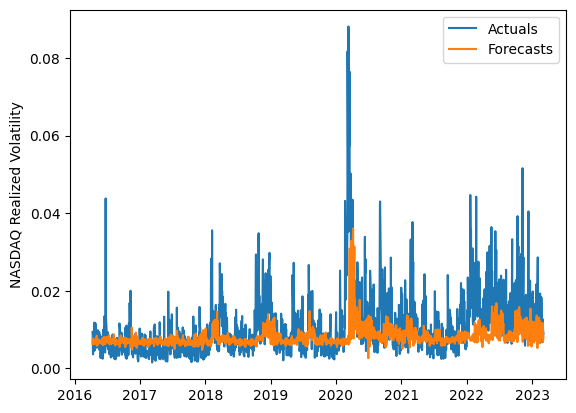

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])